In [11]:
import pandas as pd

In [12]:
properties = ["寒", "热", "温", "凉", "平", "辛", "甘", "酸", "苦", "咸", "淡", "涩"]
meridians = ["肝", "心", "脾", "肺", "肾", "胆", "小肠", "胃", "大肠", "膀胱", "心包"]
all_list = properties + meridians
print(all_list)

['寒', '热', '温', '凉', '平', '辛', '甘', '酸', '苦', '咸', '淡', '涩', '肝', '心', '脾', '肺', '肾', '胆', '小肠', '胃', '大肠', '膀胱', '心包']


In [13]:
df = pd.read_excel("四气五味+归经_703.xlsx")
df

,Chinese_name,Properties_Chinese,Meridians_Chinese
0,矮地茶,"辛,微苦,平","肺,肝"
1,艾叶,"辛,苦,温,有小毒","肝,脾,肾"
2,安息香,"辛,苦,平","心,脾"
3,八角茴香,"辛,温","肝,肾,脾,胃"
4,八角莲,"苦,辛,温,有毒","肺,肝"
...,...,...,...
703,有瓜石斛,"甘,淡,凉","肺,胃,肾"
704,茯神,"甘,淡,平","心,脾"
705,浮小麦,"甘,凉",心
706,煅龙骨,"甘,涩,平","心,肝,肾,大肠"


In [14]:
res = []
for idx, row in df.iterrows():
    herb_name = row["Chinese_name"]
    properties = row["Properties_Chinese"].split(",") if pd.notna(row["Properties_Chinese"]) else []
    meridians = row["Meridians_Chinese"].split(",") if pd.notna(row["Meridians_Chinese"]) else []
    herb_attr = set(properties + meridians)
    herb_boolean = [1 if attr in herb_attr else 0 for attr in all_list]
    res.append([herb_name] + herb_boolean)
df_boolean = pd.DataFrame(res, columns=["herb_name"] + all_list)

df_boolean

,herb_name,寒,热,温,凉,平,辛,甘,酸,苦,...,心,脾,肺,肾,胆,小肠,胃,大肠,膀胱,心包
0,矮地茶,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,艾叶,0,0,1,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2,安息香,0,0,0,0,1,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0
3,八角茴香,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4,八角莲,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,有瓜石斛,0,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
704,茯神,0,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
705,浮小麦,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
706,煅龙骨,0,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [15]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
# set Chinese font for matplotlib
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

features = df_boolean.iloc[:, 1:].values
# 初始化UMAP模型
reducer = umap.UMAP(n_components=2)
# 进行降维
embedding = reducer.fit_transform(features)
# 转换为DataFrame方便后续处理
embedding_df = pd.DataFrame(embedding, columns=['dim1', 'dim2'])
# 假设原数据中第一列是草药名称，添加回来
embedding_df['herb_name'] = df_boolean['herb_name']


c:\ProgramData\miniconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [16]:
# embedding_df = pd.read_csv("herb_embedding_umap.csv")
embedding_df

,dim1,dim2,herb_name
0,4.707801,-13.325339,矮地茶
1,3.147003,-12.150185,艾叶
2,5.131423,-12.742890,安息香
3,2.243088,-14.023340,八角茴香
4,3.451153,-13.562305,八角莲
...,...,...,...
703,7.017133,-7.349388,有瓜石斛
704,5.554207,-6.073247,茯神
705,5.169498,-9.095431,浮小麦
706,5.035561,-6.408543,煅龙骨


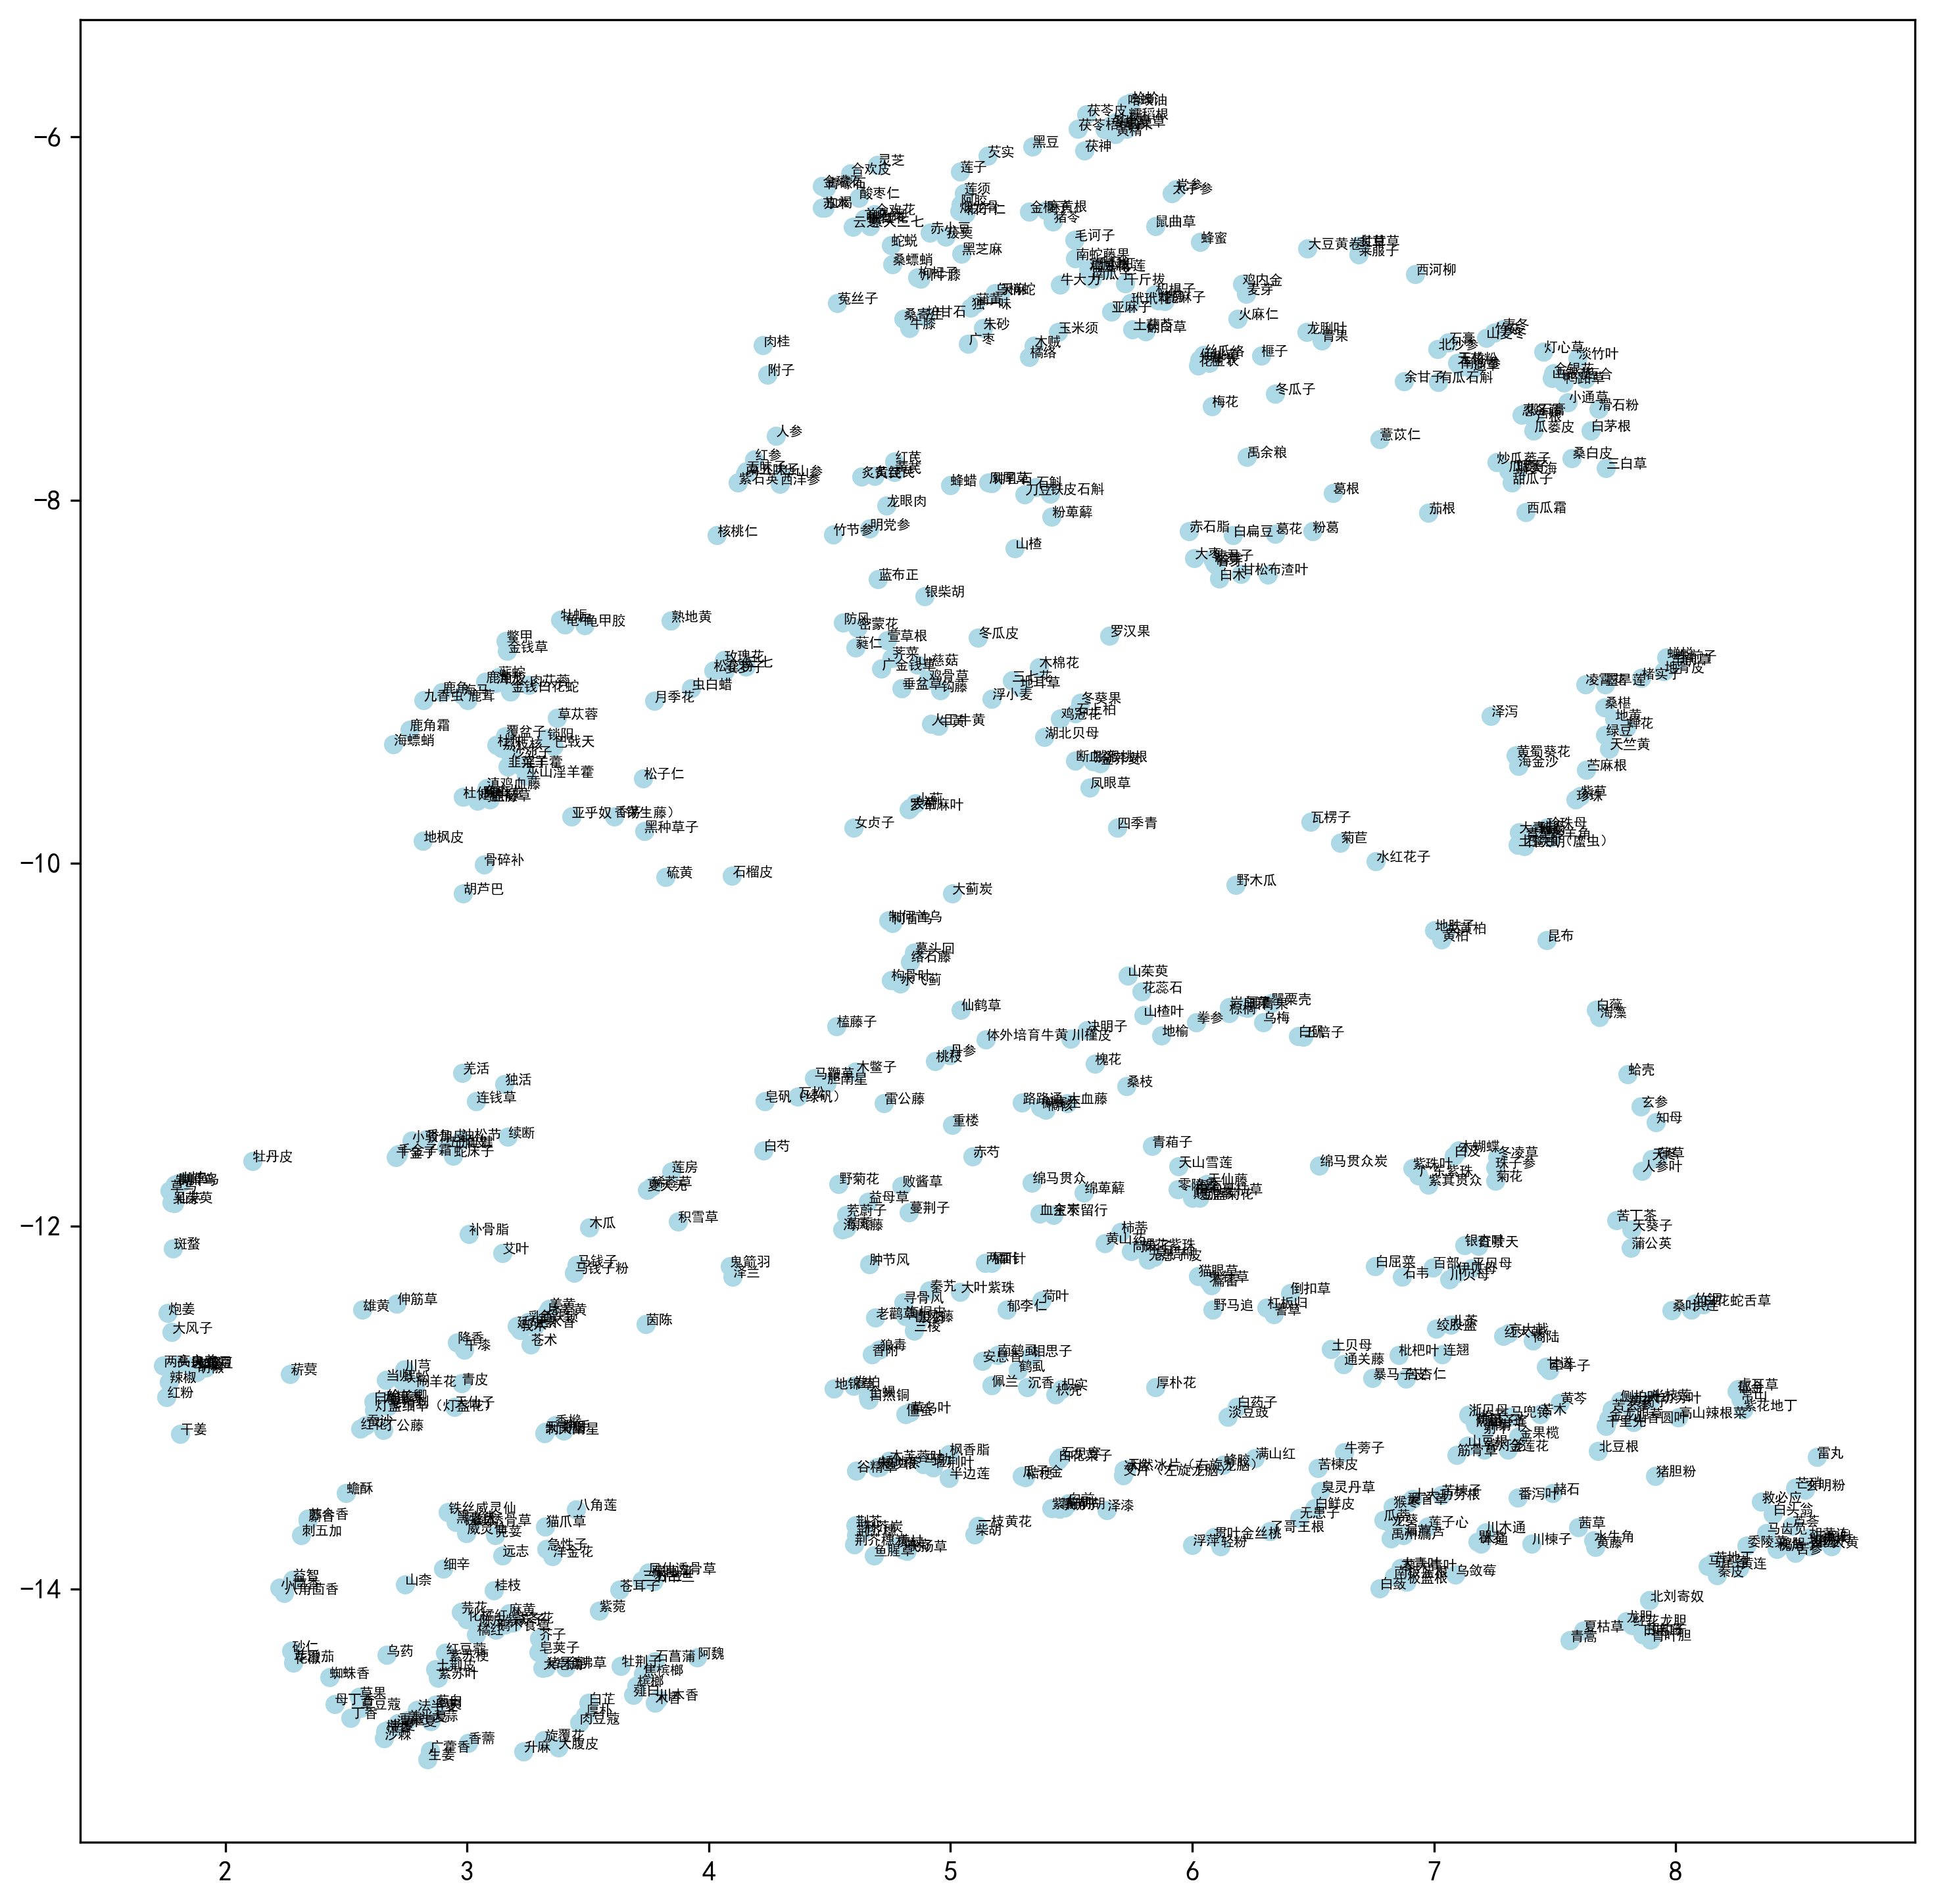

In [17]:
# 可视化
plt.figure(figsize=(12, 12), dpi=300)
plt.scatter(embedding_df['dim1'], embedding_df['dim2'], color="lightblue")
for i, txt in enumerate(embedding_df['herb_name']):
    plt.annotate(txt, (embedding_df['dim1'][i], embedding_df['dim2'][i]), fontsize=5)
plt.show()

In [18]:
embedding_df.to_csv("herb_embedding_umap.csv", index=False)

In [19]:
embedding_df.to_json("herb_embedding_umap.json", orient="records", force_ascii=False)